<a href="https://colab.research.google.com/github/Mariana2004-01/-2/blob/main/%D0%9C%D0%A1%D0%A8%D0%86_%D0%BB%D0%B0%D0%B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# функція нормалізації
def min_max_normalization(data):
    # Знаходимо мінімальне та максимальне значення у даних
    min_val = min(data)
    max_val = max(data)

    # Виконуємо мін-макс нормалізацію для кожного значення у даних
    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]

    return normalized_data

In [ ]:
# Згенеруємо вхідні ознаки та відповіді у межах [0, 1]
n = 500
x = np.random.rand(n)
y = 2 * x + 1 + np.random.randn(n) * 0.4  # Лінійна регресія з шумом
y = min_max_normalization(y)
df = pd.DataFrame({'x': x, 'y': y})
x = df[['x']].values

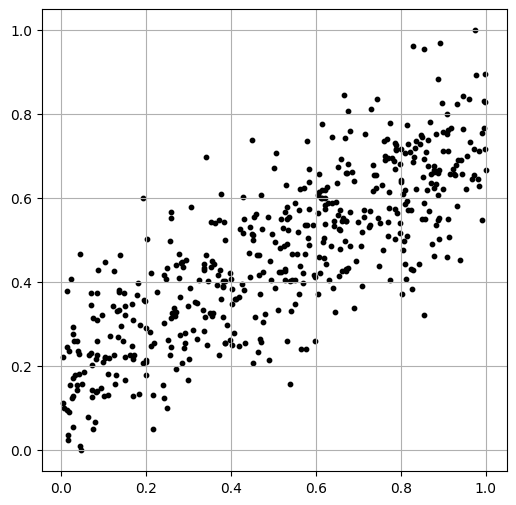

In [ ]:
# поточний графік для всієї вибірки
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s = 10, color='#000')
plt.grid(True)
plt.show()

Розмір навчальної вибірки: (400, 1)
Розмір тестової вибірки: (100, 1)


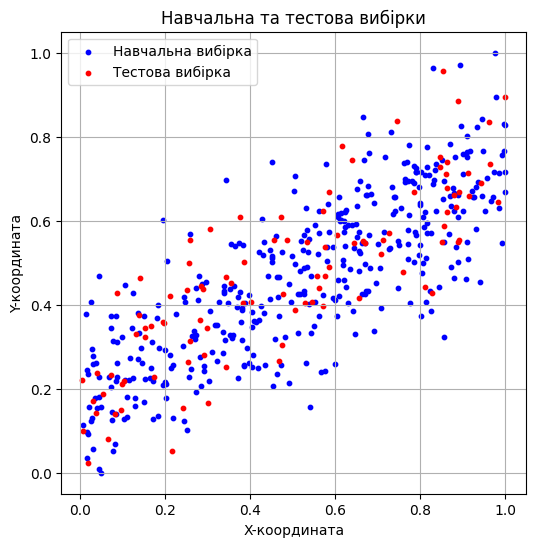

In [ ]:
from sklearn.model_selection import train_test_split

# Розділіть дані на навчальну та тестову вибірки (наприклад, 80% навчальної та 20% тестової)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Виведення розмірів навчальної та тестової вибірок
print("Розмір навчальної вибірки:", X_train.shape)
print("Розмір тестової вибірки:", X_test.shape)

# Візуалізація навчальної вибірки
plt.figure(figsize=(6, 6))
plt.scatter(X_train, y_train, s=10, color='blue', label='Навчальна вибірка')
plt.grid(True)

# Візуалізація тестової вибірки
plt.scatter(X_test, y_test, s=10, color='red', label='Тестова вибірка')
plt.grid(True)

plt.xlabel('X-координата')
plt.ylabel('Y-координата')
plt.title('Навчальна та тестова вибірки')
plt.legend()
plt.show()


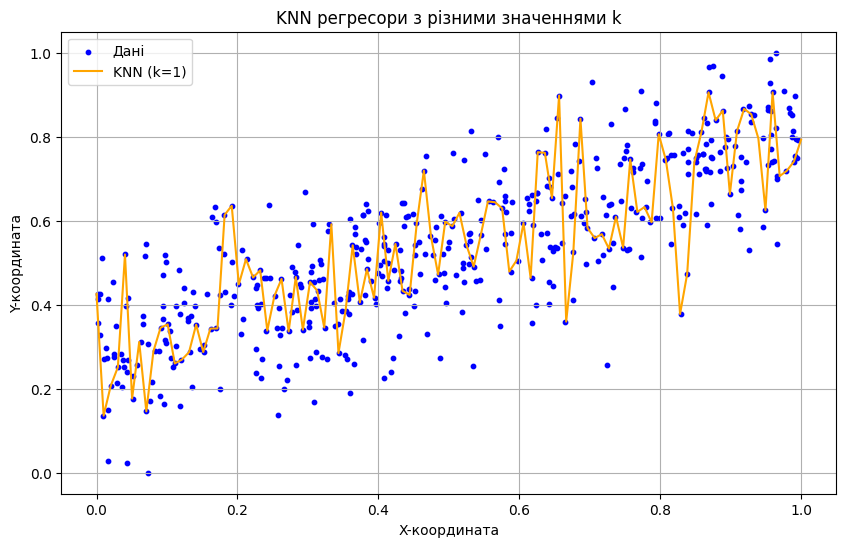

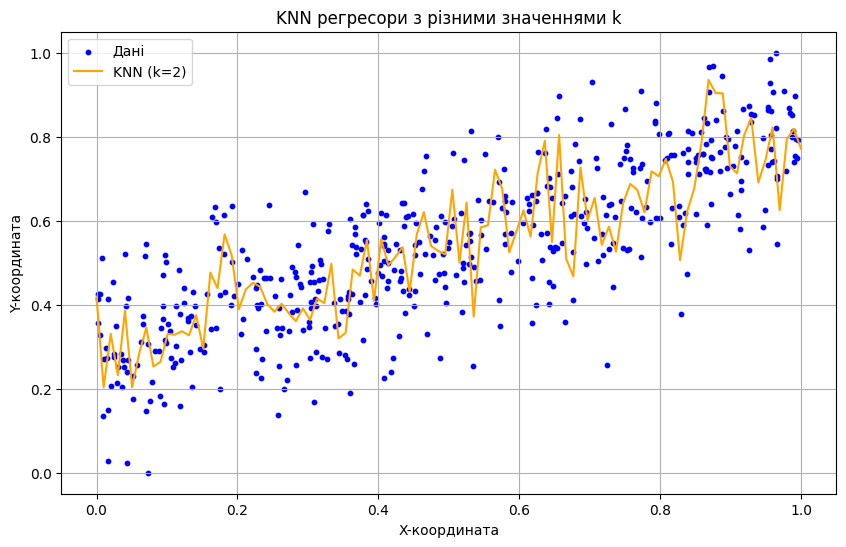

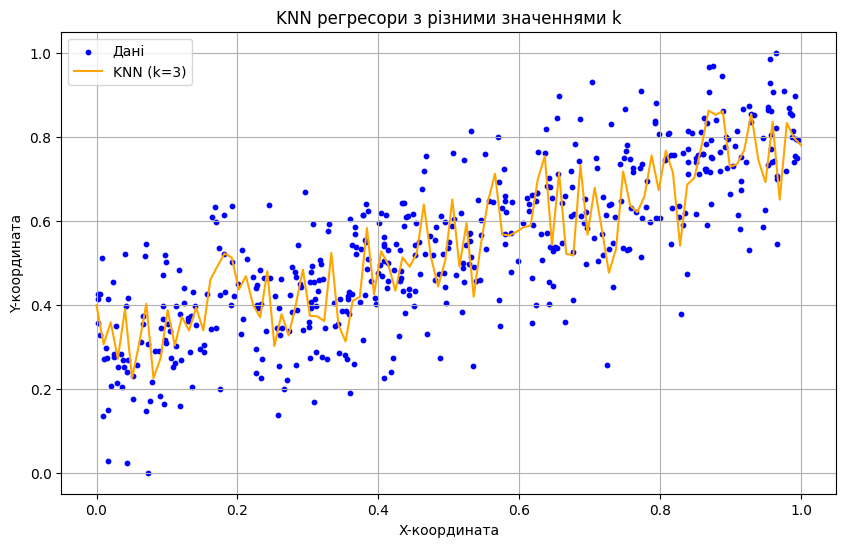

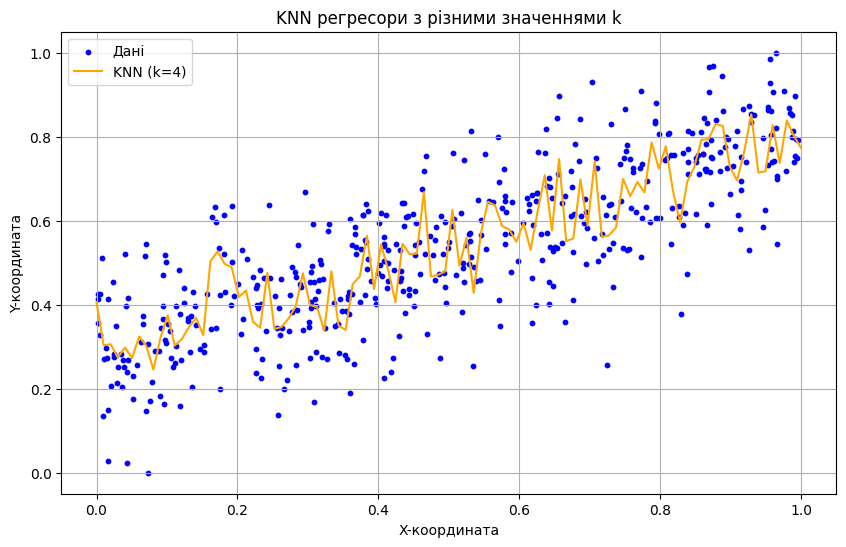

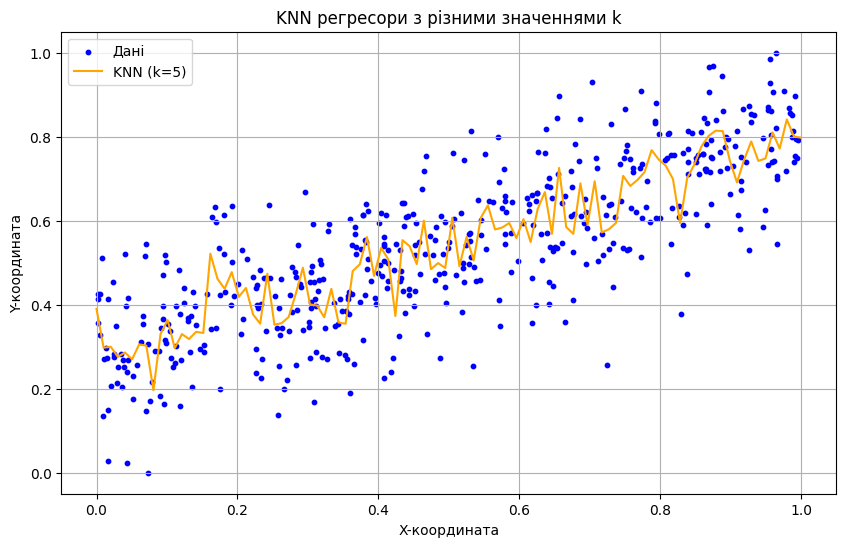

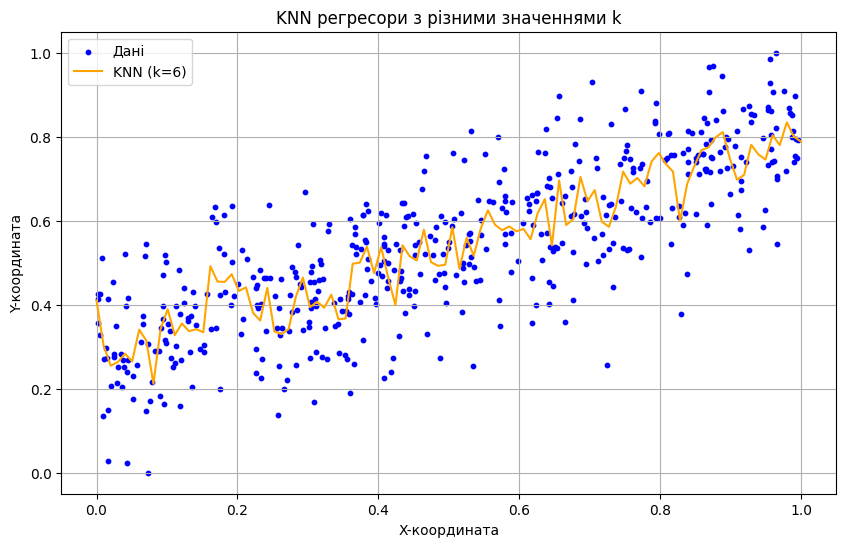

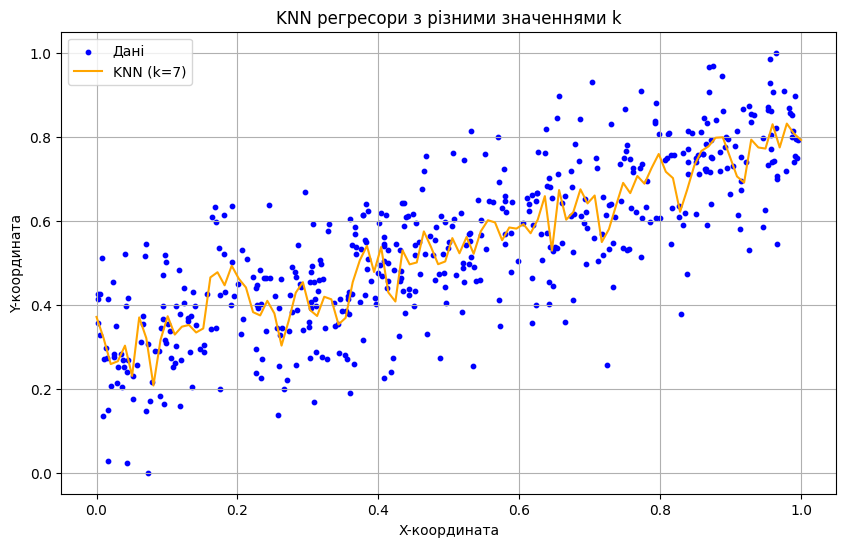

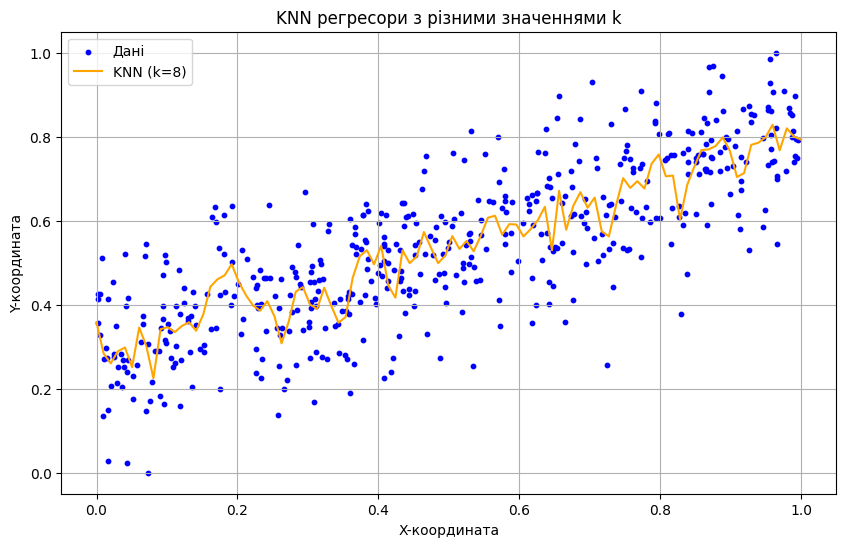

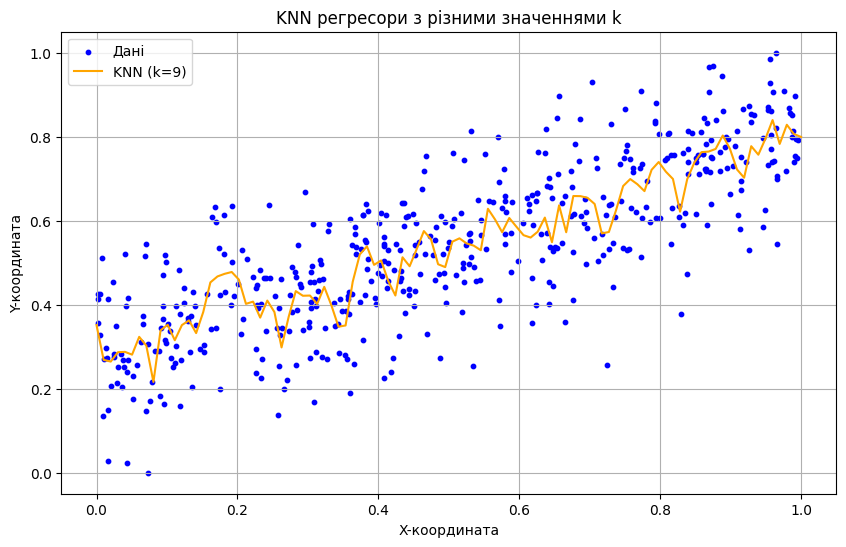

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція для обчислення середнього значення на основі k найближчих сусідів
def custom_knn_regression(x_train, y_train, x_test, k):
    y_pred = []
    for x in x_test:
        # Знаходимо k найближчих сусідів
        nearest_neighbors_indices = np.argsort(np.abs(x_train - x))[:k]
        # Обчислюємо середнє значення відповідей цих сусідів
        y_pred_value = np.mean(y_train[nearest_neighbors_indices])
        y_pred.append(y_pred_value)
    return y_pred

# Згенерувати вхідні ознаки та відповіді у межах [0, 1]
n = 500
x = np.random.rand(n)
y = 2 * x + 1 + np.random.randn(n) * 0.4  # Лінійна регресія з шумом

# Нормалізація відповідей
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Створити список різних значень k, з якими ви хочете навчити KNN
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Вивчені моделі KNN для різних значень k
knn_models = {}

# Навчання KNN регресорів з різними значеннями k
for k in k_values:
    y_pred = custom_knn_regression(x, y, x, k)
    knn_models[k] = y_pred

# Підготовка даних для візуалізації
x_test = np.linspace(0, 1, 100)
y_pred = {k: custom_knn_regression(x, y, x_test, k) for k in k_values}

# Візуалізація результатів

for k, y_pred_k in y_pred.items():
  plt.figure(figsize=(10, 6))
  plt.scatter(x, y, s=10, color='blue', label='Дані')
  plt.plot(x_test, y_pred_k, label=f'KNN (k={k})', color='orange')
  plt.grid(True)
  plt.xlabel('X-координата')
  plt.ylabel('Y-координата')
  plt.title('KNN регресори з різними значеннями k')
  plt.legend()
  plt.show()


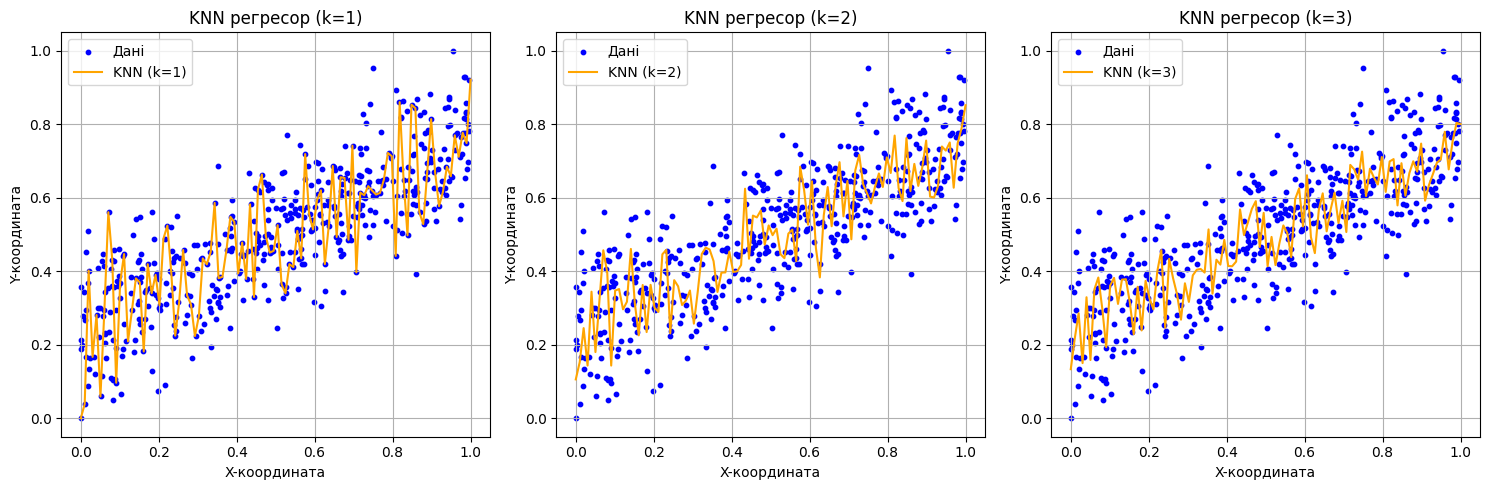

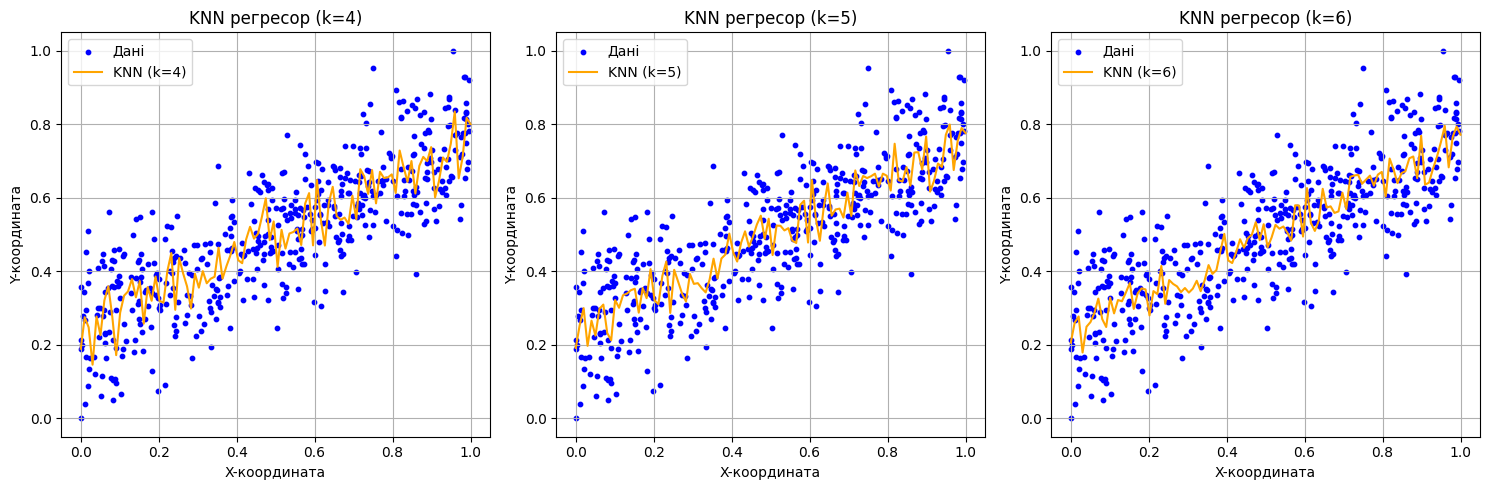

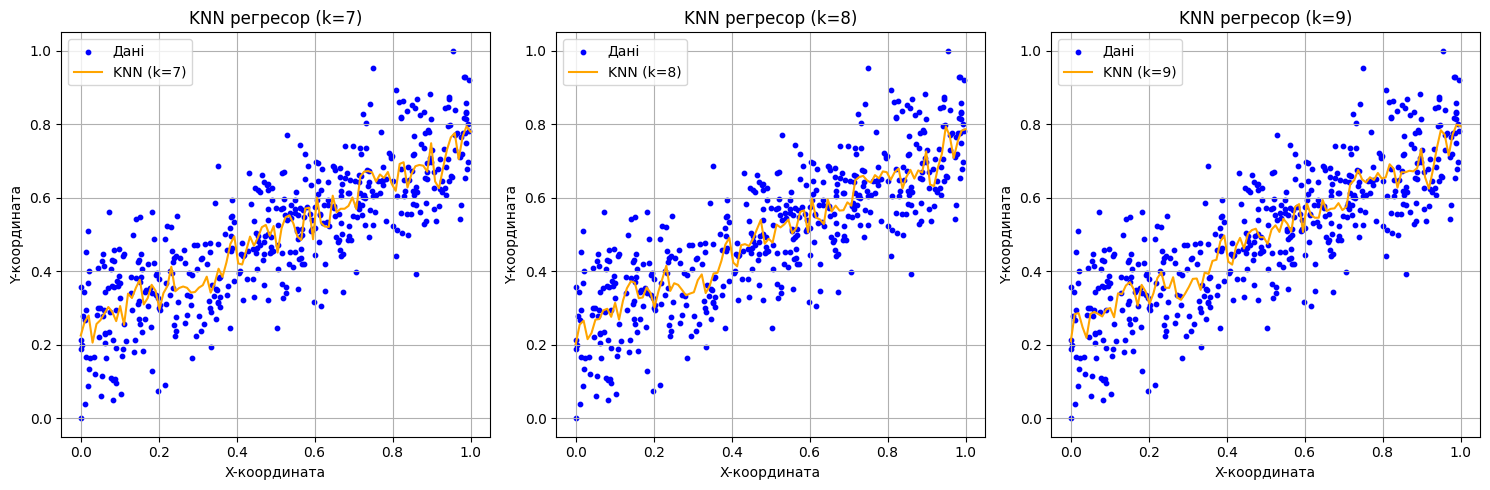

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція для обчислення середнього значення на основі k найближчих сусідів
def custom_knn_regression(x_train, y_train, x_test, k):
    y_pred = []
    for x in x_test:
        # Знаходимо k найближчих сусідів
        nearest_neighbors_indices = np.argsort(np.abs(x_train - x))[:k]
        # Обчислюємо середнє значення відповідей цих сусідів
        y_pred_value = np.mean(y_train[nearest_neighbors_indices])
        y_pred.append(y_pred_value)
    return y_pred

# Згенерувати вхідні ознаки та відповіді у межах [0, 1]
n = 500
x = np.random.rand(n)
y = 2 * x + 1 + np.random.randn(n) * 0.4  # Лінійна регресія з шумом

# Нормалізація відповідей
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Створити список різних значень k, з якими ви хочете навчити KNN
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Вивчені моделі KNN для різних значень k
knn_models = {}

# Навчання KNN регресорів з різними значеннями k
for k in k_values:
    y_pred = custom_knn_regression(x, y, x, k)
    knn_models[k] = y_pred

# Підготовка даних для візуалізації
x_test = np.linspace(0, 1, 100)
y_pred = {k: custom_knn_regression(x, y, x_test, k) for k in k_values}

# Вивуалізація результатів
num_plots_per_row = 3  # Кількість графіків в рядку
num_rows = (len(k_values) + num_plots_per_row - 1) // num_plots_per_row  # Кількість рядків

for row in range(num_rows):
    start_index = row * num_plots_per_row
    end_index = min((row + 1) * num_plots_per_row, len(k_values))

    plt.figure(figsize=(15, 5))

    for idx in range(start_index, end_index):
        k = k_values[idx]
        plt.subplot(1, num_plots_per_row, idx - start_index + 1)

        plt.scatter(x, y, s=10, color='blue', label='Дані')
        plt.plot(x_test, y_pred[k], label=f'KNN (k={k})', color='orange')
        plt.grid(True)
        plt.xlabel('X-координата')
        plt.ylabel('Y-координата')
        plt.title(f'KNN регресор (k={k})')
        plt.legend()

    plt.tight_layout()
    plt.show()


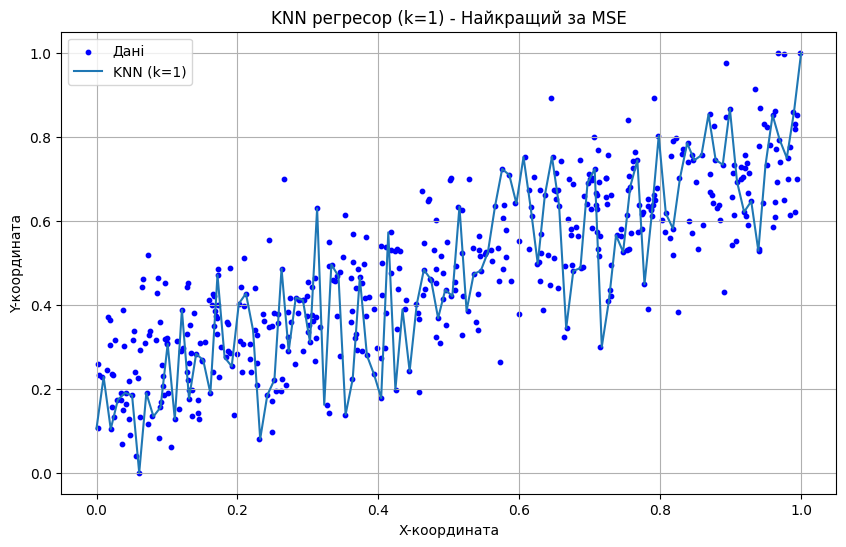

Найкраще значення k: 1, MSE: 0.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція для обчислення середнього значення на основі k найближчих сусідів
def custom_knn_regression(x_train, y_train, x_test, k):
    y_pred = []
    for x in x_test:
        # Знаходимо k найближчих сусідів
        nearest_neighbors_indices = np.argsort(np.abs(x_train - x))[:k]
        # Обчислюємо середнє значення відповідей цих сусідів
        y_pred_value = np.mean(y_train[nearest_neighbors_indices])
        y_pred.append(y_pred_value)
    return y_pred

# Згенерувати вхідні ознаки та відповіді у межах [0, 1]
n = 500
x = np.random.rand(n)
y = 2 * x + 1 + np.random.randn(n) * 0.4  # Лінійна регресія з шумом

# Нормалізація відповідей
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Створити список різних значень k, з якими ви хочете навчити KNN
k_values = [1, 3, 5, 7, 9]

# Словник для зберігання MSE для кожного значення k
mse_values = {}

# Навчання KNN регресорів з різними значеннями k і обчислення MSE
for k in k_values:
    y_pred = custom_knn_regression(x, y, x, k)
    mse = np.mean((y - y_pred) ** 2)
    mse_values[k] = mse

# Вибір найкращого значення k на основі MSE
best_k = min(mse_values, key=mse_values.get)

# Підготовка даних для візуалізації
x_test = np.linspace(0, 1, 100)
y_pred = custom_knn_regression(x, y, x_test, best_k)

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, color='blue', label='Дані')
plt.plot(x_test, y_pred, label=f'KNN (k={best_k})')
plt.grid(True)
plt.xlabel('X-координата')
plt.ylabel('Y-координата')
plt.title(f'KNN регресор (k={best_k}) - Найкращий за MSE')
plt.legend()
plt.show()

print(f"Найкраще значення k: {best_k}, MSE: {mse_values[best_k]:.2f}")


In [ ]:
from sklearn.metrics import r2_score

# Збирання даних
n = 500
x = np.random.rand(n)
y = 2 * x + 1 + np.random.randn(n) * 0.4
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Створення списку різних значень k
k_values =[ 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Вивчені моделі KNN для різних значень k
knn_models = {}

# Навчання KNN регресорів з різними значеннями k
for k in k_values:
    y_pred = custom_knn_regression(x, y, x, k)
    knn_models[k] = y_pred

# Визначення істинних значень відгуку для тестових даних
x_test = np.linspace(0, 1, 100)
y_true = 2 * x_test + 1

# Підрахунок R² для кожної моделі KNN з різними значеннями k
r2_scores = {k: r2_score(y, knn_models[k]) for k in k_values}

# Виведення коефіцієнтів детермінації R² для кожної моделі
for k, r2 in r2_scores.items():
    print(f"KNN (k={k}) - R²: {r2}")


KNN (k=1) - R²: 1.0
KNN (k=2) - R²: 0.8014021940961654
KNN (k=3) - R²: 0.7475286845302418
KNN (k=4) - R²: 0.71045647784359
KNN (k=5) - R²: 0.6917355473477356
KNN (k=6) - R²: 0.6787556839941804
KNN (k=7) - R²: 0.6664072837995816
KNN (k=8) - R²: 0.6597938135176692
KNN (k=9) - R²: 0.6542222239878528


KNN (k=1) - R²: 1.0
KNN (k=2) - R²: 0.8491309696403334
KNN (k=3) - R²: 0.7919767953510853
KNN (k=4) - R²: 0.7738085013322926
KNN (k=5) - R²: 0.7581135433266776
KNN (k=6) - R²: 0.7457419185344601
KNN (k=7) - R²: 0.7323180205629756
KNN (k=8) - R²: 0.7260951056017009
KNN (k=9) - R²: 0.7216810996830654


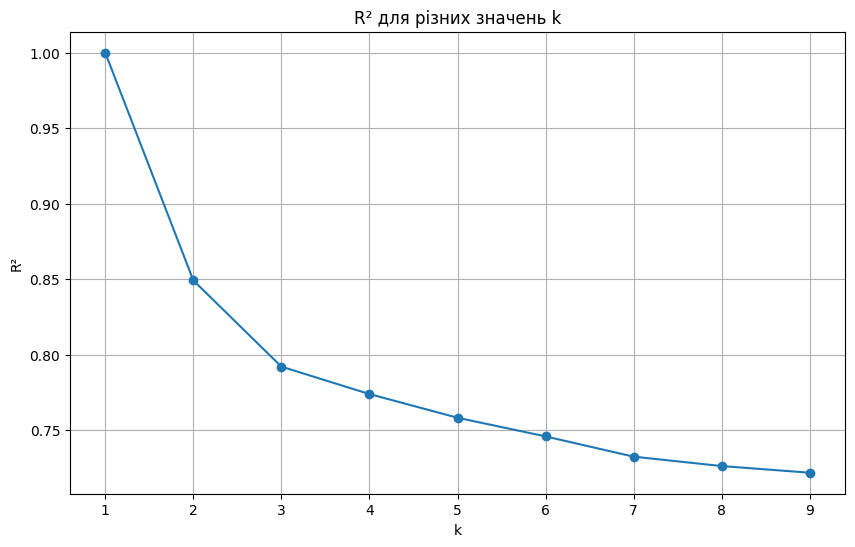

In [ ]:
from sklearn.metrics import r2_score

# Збирання даних
n = 500
x = np.random.rand(n)
y = 2 * x + 1 + np.random.randn(n) * 0.4
y = (y - np.min(y)) / (np.max(y) - np.min(y))

# Створення списку різних значень k
k_values = [ 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Вивчені моделі KNN для різних значень k
knn_models = {}

# Навчання KNN регресорів з різними значеннями k
for k in k_values:
    y_pred = custom_knn_regression(x, y, x, k)
    knn_models[k] = y_pred

# Визначення істинних значень відгуку для тестових даних
x_test = np.linspace(0, 1, 100)
y_true = 2 * x_test + 1

# Підрахунок R² для кожної моделі KNN з різними значеннями k
r2_scores = {k: r2_score(y, knn_models[k]) for k in k_values}

# Виведення коефіцієнтів детермінації R² для кожної моделі
for k, r2 in r2_scores.items():
    print(f"KNN (k={k}) - R²: {r2}")

# Виведення графіків R²
plt.figure(figsize=(10, 6))
plt.plot(k_values, [r2_scores[k] for k in k_values], marker='o', linestyle='-')
plt.title('R² для різних значень k')
plt.xlabel('k')
plt.ylabel('R²')
plt.grid(True)
plt.show()
